In [31]:
import pandas as pd
import glob

In [32]:
paths = glob.glob('*.csv')
paths

['kt배달데이터1.csv', 'kt배달데이터2.csv']

In [33]:
data = pd.read_csv(paths[0], header = None, names= ['date', 'time(hour)', 'region1', 'region2', 'order_count'])
data

,date,time(hour),region1,region2,order_count
0,2019-07-18,0,강원도,속초시,1
1,2019-07-18,0,경기도,고양시 일산동구,15
2,2019-07-18,0,경기도,고양시 일산서구,6
3,2019-07-18,0,경기도,의정부시,65
4,2019-07-18,0,경기도,파주시,2
...,...,...,...,...,...
381063,2020-08-31,23,전라북도,군산시,38
381064,2020-08-31,23,제주특별자치도,서귀포시,13
381065,2020-08-31,23,충청남도,서산시,22
381066,2020-08-31,23,충청북도,제천시,7


In [34]:
data = data[data['region1']=='서울특별시']
data

,date,time(hour),region1,region2,order_count
6,2019-07-18,0,서울특별시,구로구,16
7,2019-07-18,0,서울특별시,동작구,1
8,2019-07-18,0,서울특별시,마포구,3
9,2019-07-18,0,서울특별시,영등포구,14
17,2019-07-18,1,서울특별시,구로구,6
...,...,...,...,...,...
381056,2020-08-31,23,서울특별시,도봉구,4
381057,2020-08-31,23,서울특별시,양천구,8
381058,2020-08-31,23,서울특별시,영등포구,44
381059,2020-08-31,23,서울특별시,용산구,1


In [35]:
data = data.groupby(['date', 'time(hour)'])[['order_count']].sum()
data

order_count
date       time(hour)             
2019-07-18 0                    34
           1                    14
           2                     7
           9                     3
           10                   35
...                            ...
2020-08-31 19                  806
           20                  598
           21                  438
           22                  289
           23                  157

[8761 rows x 1 columns]

In [39]:
hourly_mean = data.groupby(['time(hour)'])[['order_count']].mean()
hourly_mean

,order_count
time(hour),
0,84.762255
1,41.504902
2,12.072682
3,9.417391
4,8.728889
5,8.088608
6,8.769231
7,9.460870
8,11.460630


In [40]:
hourly_std = data.groupby(['time(hour)'])[['order_count']].std()
hourly_std

,order_count
time(hour),
0,29.387186
1,17.118462
2,10.612746
3,8.254132
4,7.497756
5,6.143461
6,7.050869
7,7.211450
8,8.535697


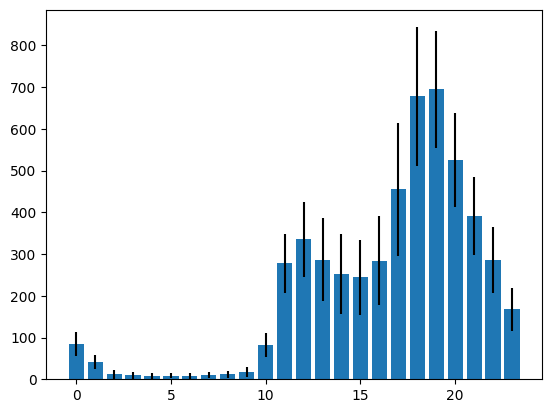

In [45]:
import matplotlib.pyplot as plt
plt.bar(hourly_mean.index, hourly_mean['order_count'], yerr = hourly_std['order_count'])
plt.show()